Importing Necessary Libraries

In [84]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Getting into the data

In [85]:
df = pd.read_csv(r'/90Percent_ClassData.csv')

In [86]:
df.drop(columns=['Unnamed: 0'], inplace = True)
df

,TweetID,Username,Text,CreateDate,Biased,Calling_Out,Keyword
0,1396032368515813377,ASkepblue,This kind of remainds me of how some random 12...,2021-05-22 09:17:08+00:00,0,0,Asians
1,1362607553029558272,prua732,RT @MarkDice: Joe Biden says blacks and Hispan...,2021-02-19 03:38:51+00:00,0,0,Blacks
2,1390703170712588291,IuicNew,https://t.co/F0PoDBsiQn\n\n🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥 \n\nT...,2021-05-07 16:20:48+00:00,0,0,Latinos
3,1237888923495325696,lixyouth,RT @Pakiiinextdoor: The Middle East literally ...,2020-03-11 23:51:32+00:00,0,1,Asians
4,1440952710912565253,LawrenceWin1,@smh @marywardy @Nigelgladstone 👮‍♀️Israel fai...,2021-09-23 08:14:32+00:00,0,0,Jews
...,...,...,...,...,...,...,...
5395,1353667209701294080,BiztheBuz,RT @markcurtis30: UK arms and killings continu...,2021-01-25 11:33:07+00:00,0,0,Asians
5396,1379290703864459270,COMA387Group2,Why Google sucks: Google racializes Muslims by...,2021-04-06 04:31:44+00:00,0,1,Muslims
5397,1323188100370108417,krmanishsingh,RT @Iyervval: What happened to “a vast majorit...,2020-11-02 09:00:01+00:00,1,0,Muslims
5398,1273546532688662531,DaveBell100,I wonder what the BLM's thoughts are about the...,2020-06-18 09:22:09+00:00,0,0,Jews


In [87]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.split(s)

In [88]:
test = pd.read_csv('/90Percent_GoldStander_Data.csv')

In [89]:
n=df.shape[0]

In [90]:
train=df.drop(['TweetID'],axis=1)
test=test.drop(['TweetID'],axis=1)

In [91]:
display(train.head())
display(test.head())

,Username,Text,CreateDate,Biased,Calling_Out,Keyword
0,ASkepblue,This kind of remainds me of how some random 12...,2021-05-22 09:17:08+00:00,0,0,Asians
1,prua732,RT @MarkDice: Joe Biden says blacks and Hispan...,2021-02-19 03:38:51+00:00,0,0,Blacks
2,IuicNew,https://t.co/F0PoDBsiQn\n\n🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥 \n\nT...,2021-05-07 16:20:48+00:00,0,0,Latinos
3,lixyouth,RT @Pakiiinextdoor: The Middle East literally ...,2020-03-11 23:51:32+00:00,0,1,Asians
4,LawrenceWin1,@smh @marywardy @Nigelgladstone 👮‍♀️Israel fai...,2021-09-23 08:14:32+00:00,0,0,Jews


,Unnamed: 0,Username,Text,CreateDate,Biased,CO,Keyword
0,4436,dillontj,Brooklyn: Orthodox Jews protesting Governor An...,2020-10-08 13:13:22+00:00,0,0,Jews
1,4561,RedBirdRight,"According to Twitter, it is perfectly acceptab...",2020-07-31 19:10:02+00:00,0,0,Jews
2,4431,HaleyTessIsis,@EinsteinsMagic NEVER AGAIN.\n\nThe Democrat P...,2020-10-07 12:36:21+00:00,1,0,Jews
3,6396,Morristhecat79,A jew hating antisemite tweets:\n“You’re a Zio...,2019-01-20 17:47:30+00:00,1,0,ZioNazi
4,2789,IreneBr97053646,You soulless going to hell man. You are empty....,2020-03-13 17:11:40+00:00,1,0,Jews


Text lengths vary a lot

(20.0, 934.0, 88.62301628611468, 218.12803409301463)

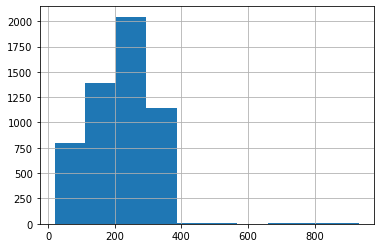

In [92]:
lens=train['Text'].str.len()
lens.hist()
lens.min(),lens.max(),lens.std(),lens.mean()

Cleaning the data

In [93]:
train_drop=train[['Biased', 'Calling_Out', 'Keyword']]
cols=['Biased', 'Calling_Out', 'Keyword']
good=1-train_drop.max(axis=1)

train['good']=good
display(train.head(5))
test.head()
no_comment=train[train['Text'].isnull()]
print("nulls in train are {}".format(len(no_comment)))

<ipython-input-93-ddc85fdee220>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  good=1-train_drop.max(axis=1)


,Username,Text,CreateDate,Biased,Calling_Out,Keyword,good
0,ASkepblue,This kind of remainds me of how some random 12...,2021-05-22 09:17:08+00:00,0,0,Asians,1
1,prua732,RT @MarkDice: Joe Biden says blacks and Hispan...,2021-02-19 03:38:51+00:00,0,0,Blacks,1
2,IuicNew,https://t.co/F0PoDBsiQn\n\n🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥 \n\nT...,2021-05-07 16:20:48+00:00,0,0,Latinos,1
3,lixyouth,RT @Pakiiinextdoor: The Middle East literally ...,2020-03-11 23:51:32+00:00,0,1,Asians,0
4,LawrenceWin1,@smh @marywardy @Nigelgladstone 👮‍♀️Israel fai...,2021-09-23 08:14:32+00:00,0,0,Jews,1


nulls in train are 3


In [94]:
test.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False).shape

(6152, 7)

In [95]:
train.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False).shape

(5397, 7)

In [96]:
n=train.shape[0]

Data Normalization

In [97]:
def clean_text(text):
    text = re.sub(r"what's", "what is ", str(text))
    text = re.sub(r"\'s", " ", str(text))
    text = re.sub(r"\'ve", " have ", str(text))
    text = re.sub(r"can't", "cannot ", str(text))
    text = re.sub(r"n't", " not ", str(text))
    text = re.sub(r"i'm", "i am ", str(text))
    text = re.sub(r"\'re", " are ", str(text))
    text = re.sub(r"\'d", " would ", str(text))
    text = re.sub(r"\'ll", " will ", str(text))
    text = re.sub(r"\'scuse", " excuse ", str(text))
    text = re.sub('\W', ' ', str(text))
    text = re.sub('\s+', ' ', str(text))
    text = text.strip(' ')
    return text

In [98]:
train['Text'] = train['Text'].map(lambda com : clean_text(com))

test['Text'] = test['Text'].map(lambda com : clean_text(com))

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect= TfidfVectorizer(max_features=5000,stop_words='english')
train_vec=vect.fit_transform(train.Text)
test_vec=vect.fit_transform(test.Text)

In [100]:
display(train_vec)
display(test_vec)

<5400x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 76325 stored elements in Compressed Sparse Row format>

<6152x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 76806 stored elements in Compressed Sparse Row format>

Preparing the Model

In [101]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(C=19)

In [102]:
from sklearn.metrics import f1_score
for label in cols:
    y=train[label]
    logreg.fit(train_vec,y)
    ypred=logreg.predict(train_vec)
    test_y_prob = logreg.predict_proba(test_vec)[:,1]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy

In [103]:
f1_score(y, ypred, average='macro')

0.9920517007411913